In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import numpy as np
import math
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import normalize


plt.rcParams["figure.figsize"] = (40,6)

import warnings
warnings.filterwarnings('ignore')

In [4]:
__=pd.read_csv('../../terrorism_new.csv',encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: '../../terrorism_new.csv'

In [5]:
terror=__
# terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
# terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
# terror['casualities']=terror['Killed']+terror['Wounded']
# terror.head(3)

In [756]:
# __.nkill.value_counts()
terror = terror[terror["nkill"].notna()]
terror.shape

(180435, 135)

In [757]:
# __.nwound.value_counts()
terror = terror[terror["nwound"].notna()]
terror.shape

(173279, 135)

In [758]:
terror = terror[terror["nperps"].notna()]
terror = terror[terror["nperps"] != -99]
print(terror.shape)

(28139, 135)


In [759]:
# __.propvalue.value_counts()
terror = terror[terror["propvalue"].notna()]
terror = terror[terror["propvalue"] != -99]
terror.shape

(1002, 135)

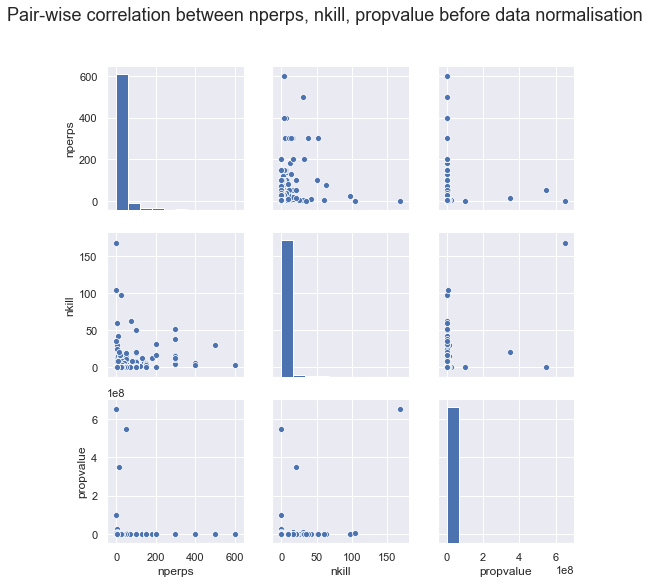

In [760]:
g = sns.pairplot(terror[['nperps', 'nkill', 'propvalue']])
g.fig.suptitle("Pair-wise correlation between nperps, nkill, propvalue before data normalisation", y=1.08, fontsize=18) # y= some height>1
print(' ')

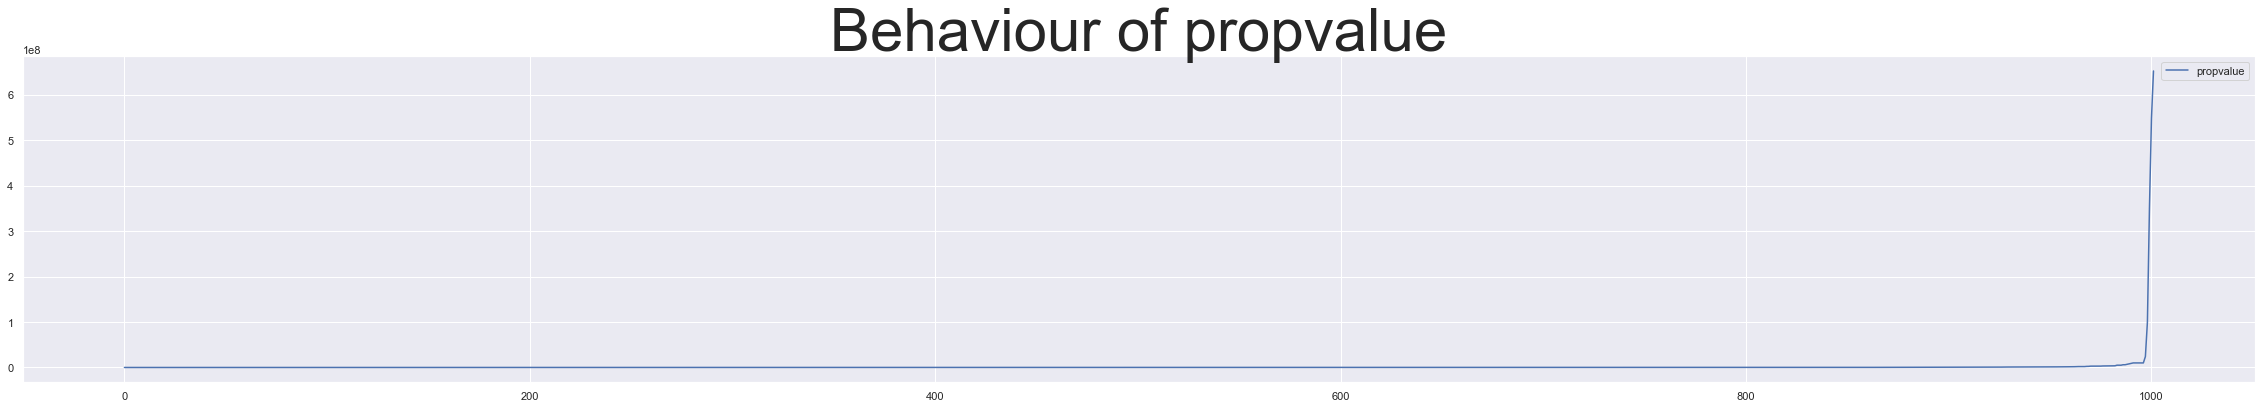

In [761]:
terror = terror.sort_values(by=['propvalue'])
terror = terror.reset_index(drop=True)
terror.plot(y='propvalue', use_index=True)
plt.title('Behaviour of propvalue', fontsize=60)
plt.show()

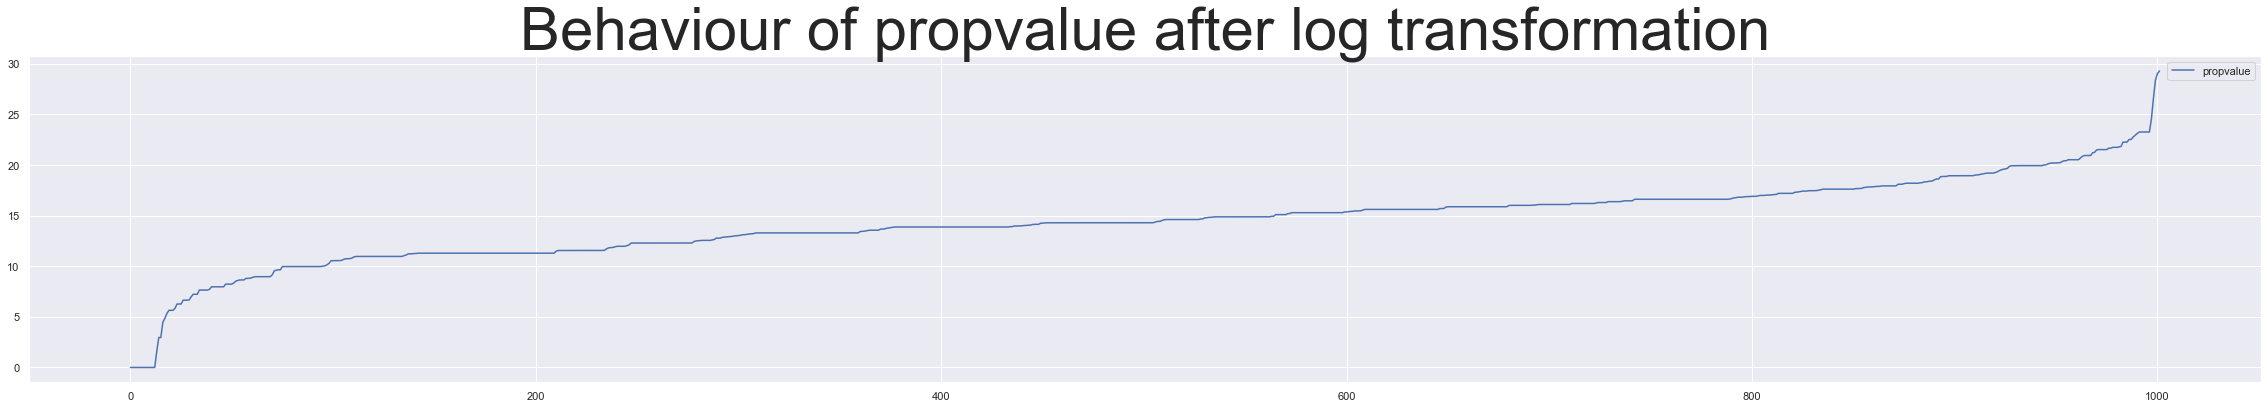

In [762]:
terror = terror.sort_values(by=['propvalue'])
terror["propvalue"] = terror["propvalue"].replace(0, np.nan)
terror["propvalue"] = np.log2(terror['propvalue'])
terror["propvalue"] = terror["propvalue"].replace(np.nan, 0)
terror = terror.reset_index(drop=True)

terror.plot(y='propvalue', use_index=True)
plt.title('Behaviour of propvalue after log transformation', fontsize=60)
plt.show()

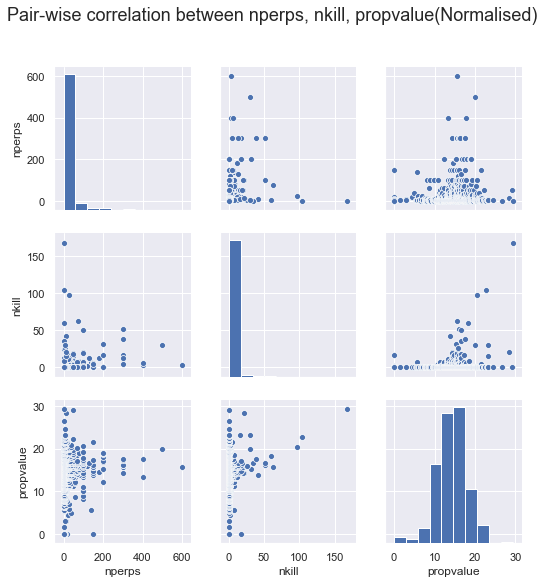

In [763]:
g = sns.pairplot(terror[['nperps', 'nkill', 'propvalue']])
g.fig.suptitle("Pair-wise correlation between nperps, nkill, propvalue(Normalised)", y=1.08, fontsize=18) # y= some height>1
print(' ')

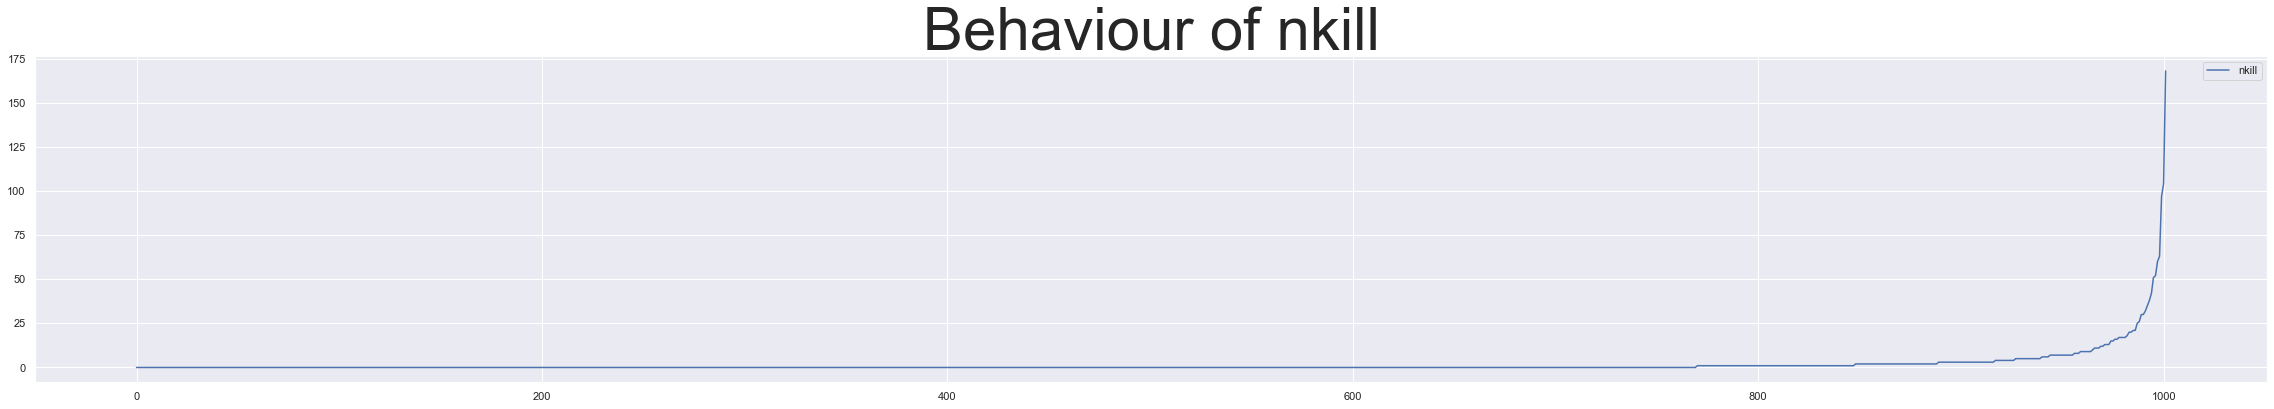

In [764]:
terror = terror.sort_values(by=['nkill'])
terror = terror.reset_index(drop=True)
terror.plot(y='nkill', use_index=True)

plt.title('Behaviour of nkill', fontsize=60)
plt.show()

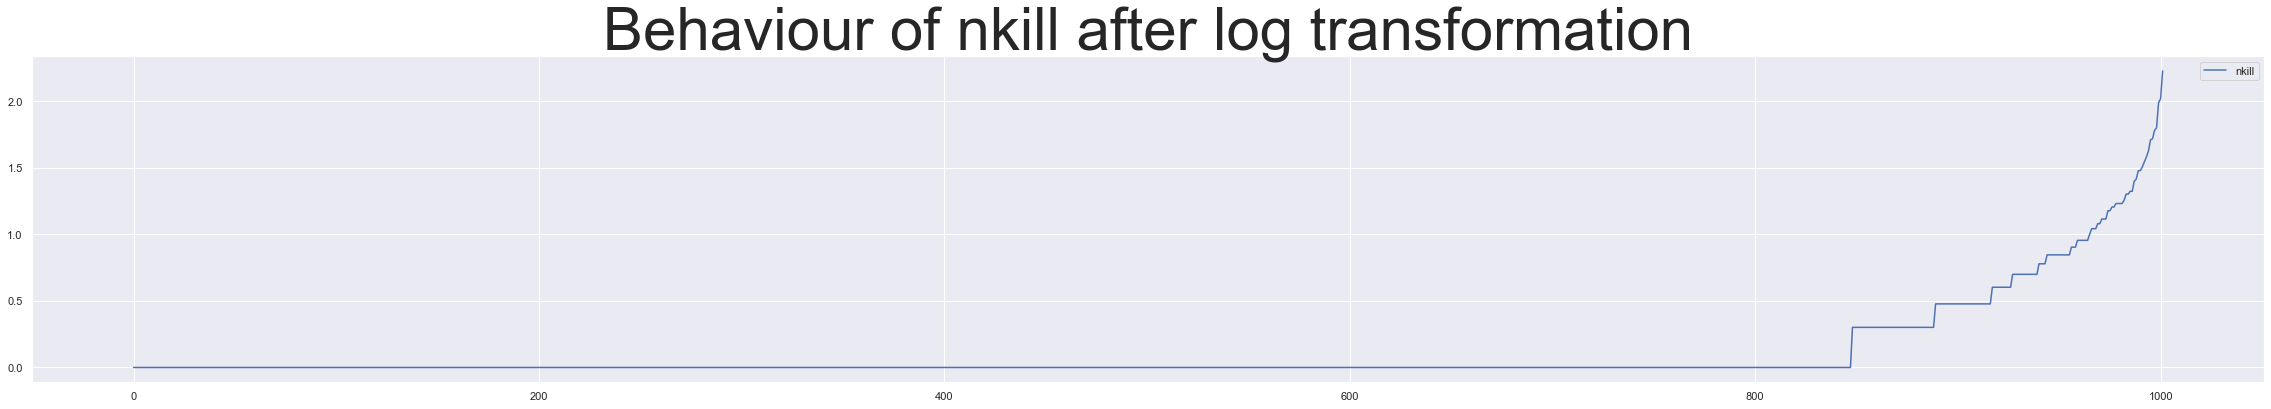

In [765]:
terror = terror.sort_values(by=['nkill'])
terror["nkill"] = terror["nkill"].replace(0, np.nan)
terror["nkill"] = np.log10(terror['nkill'])
terror["nkill"] = terror["nkill"].replace(np.nan, 0)
terror = terror.reset_index(drop=True)

terror.plot(y='nkill', use_index=True)

plt.title('Behaviour of nkill after log transformation', fontsize=60)
plt.show()

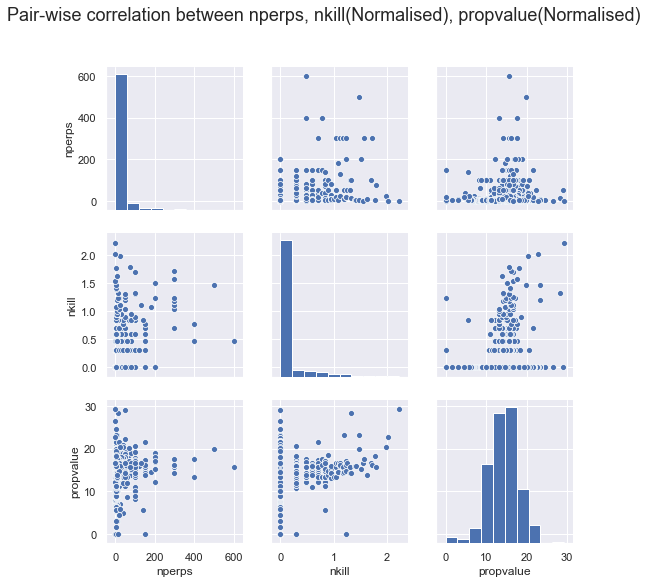

In [766]:
g = sns.pairplot(terror[['nperps', 'nkill', 'propvalue']])
g.fig.suptitle("Pair-wise correlation between nperps, nkill(Normalised), propvalue(Normalised)", y=1.08, fontsize=18) # y= some height>1
print(' ')

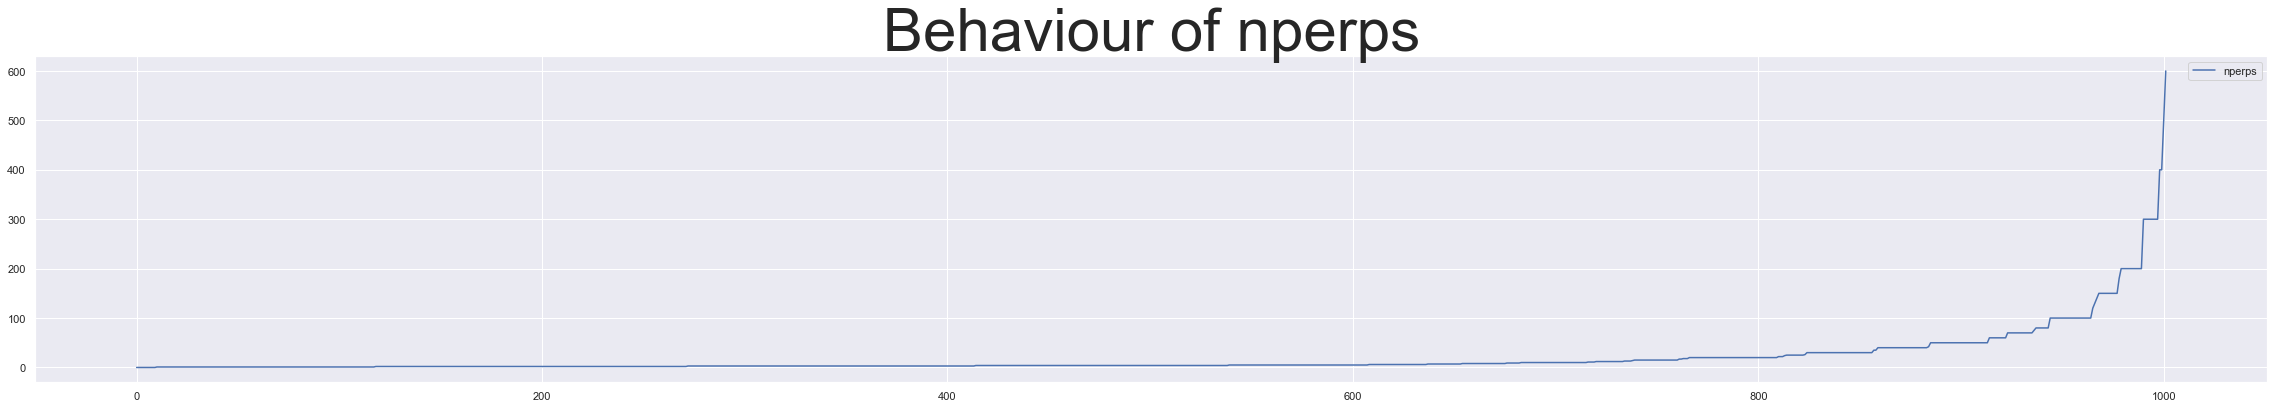

In [767]:
terror = terror.sort_values(by=['nperps'])
terror = terror.reset_index(drop=True)
terror.plot(y='nperps', use_index=True)

plt.title('Behaviour of nperps', fontsize=60)
plt.show()

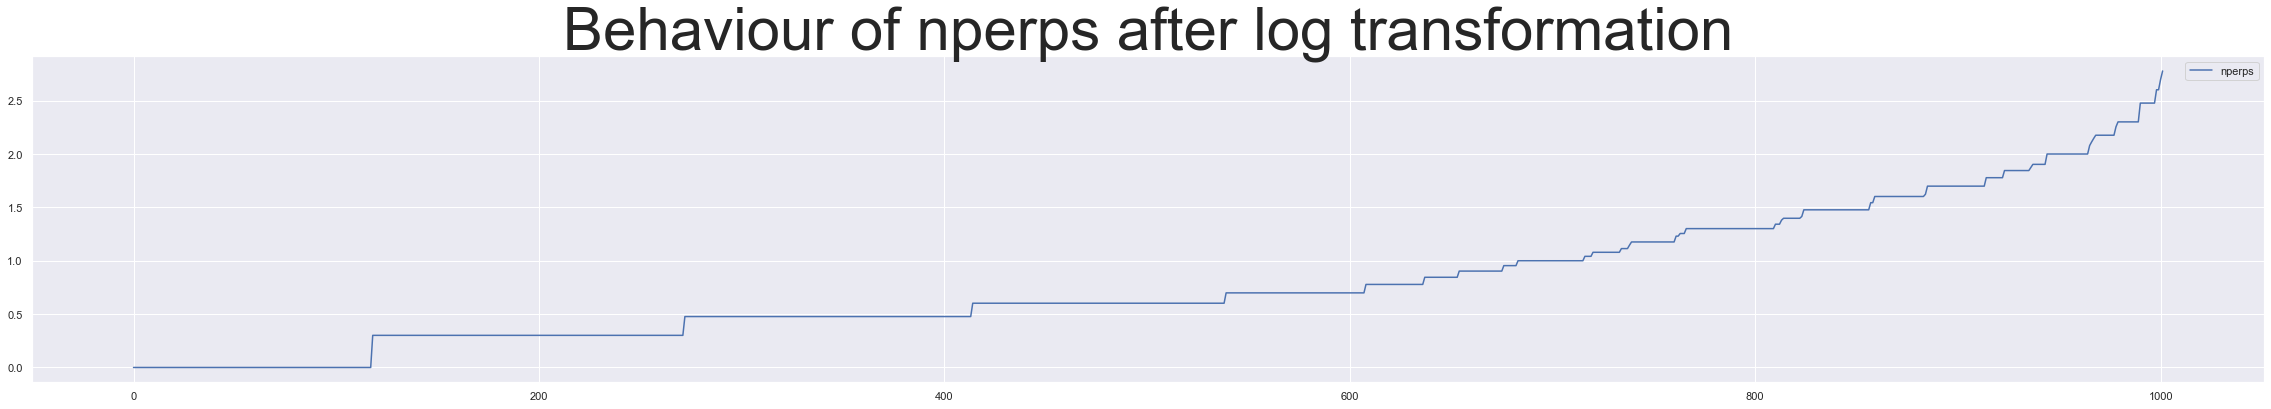

In [768]:
terror = terror.sort_values(by=['nperps'])
terror["nperps"] = terror["nperps"].replace(0, np.nan)
terror["nperps"] = np.log10(terror['nperps'])
terror["nperps"] = terror["nperps"].replace(np.nan, 0)
terror = terror.reset_index(drop=True)

terror.plot(y='nperps', use_index=True)

plt.title('Behaviour of nperps after log transformation', fontsize=60)
plt.show()

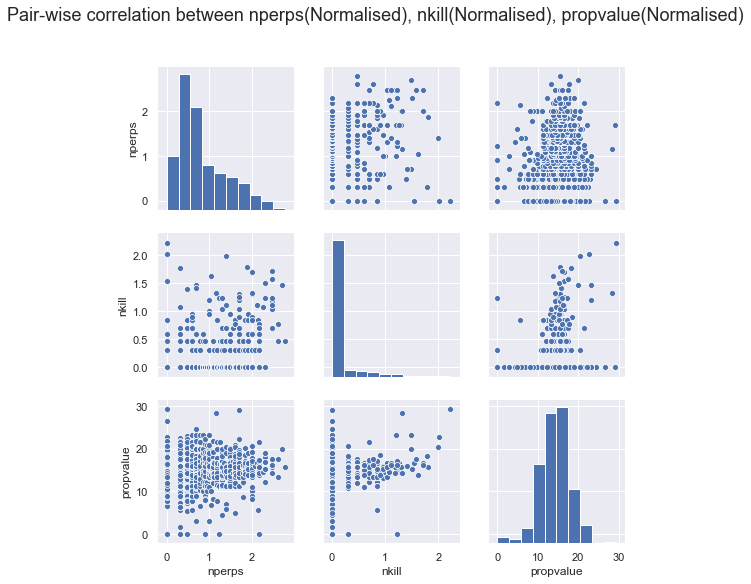

In [769]:
g = sns.pairplot(terror[['nperps', 'nkill', 'propvalue']])
g.fig.suptitle("Pair-wise correlation between nperps(Normalised), nkill(Normalised), propvalue(Normalised)", y=1.08, fontsize=18) # y= some height>1
print(' ')

In [770]:
x = terror[['nperps', 'nkill', 'propvalue']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
terror[['nperps', 'nkill', 'propvalue']] = pd.DataFrame(x_scaled)
terror['propvalue'].sample(10)

403    0.487963
111    0.419658
49     0.281036
402    0.374511
349    0.385505
149    0.394489
819    0.533111
795    0.431351
906    0.549689
269    0.601416
Name: propvalue, dtype: float64

   nperps  nkill  propvalue
0     0.0    0.0   0.374511
1     0.0    0.0   0.621394
2     0.0    0.0   0.428641
3     0.0    0.0   0.450762
4     0.0    0.0   0.587241


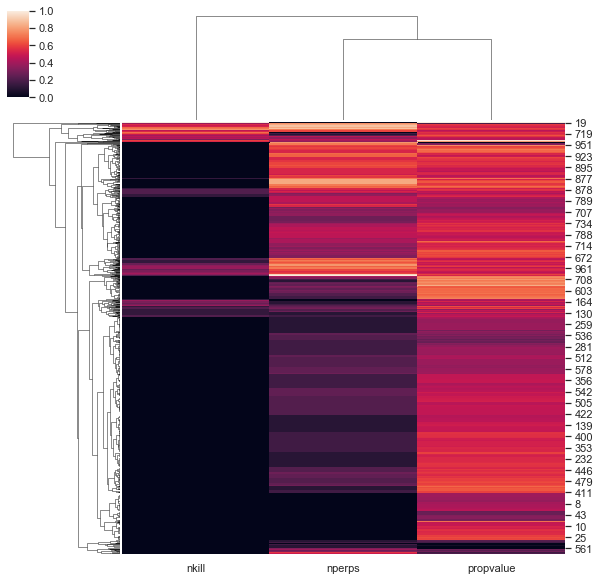

In [771]:
df = terror[['nperps','nkill',"propvalue"]]
print(df.head())
g = sns.clustermap(df)

In [717]:
terror[['country_txt','region_txt','gname','nperps','nkill',"nwound", "propvalue"]].sample(10)

,country_txt,region_txt,gname,nperps,nkill,nwound,propvalue
314,Colombia,South America,Unknown,0.477121,0.00000,0.0,8.643856
375,France,Western Europe,Popular Front for the Liberation of Palestine ...,0.477121,0.69897,3.0,13.872675
185,United States,North America,Army of God,0.301030,0.00000,0.0,16.896522
367,Argentina,South America,Ejercito Revolucionaria del Pueblo (ERP) (Arge...,0.477121,0.00000,0.0,13.872675
811,Peru,South America,Shining Path (SL),1.342423,0.30103,0.0,14.872675
386,Italy,Western Europe,Red Brigades,0.477121,0.00000,0.0,15.872675
806,El Salvador,Central America & Caribbean,Unknown,1.301030,0.00000,0.0,14.609640
832,Italy,Western Europe,Unknown,1.477121,0.00000,0.0,15.609640
947,Philippines,Southeast Asia,New People's Army (NPA),2.000000,0.00000,0.0,13.808892
221,United States,North America,Jewish Defense League (JDL),0.301030,0.00000,0.0,10.550747


In [ ]:
terror['nkill'].value_counts()